In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
#importing the urnings algortihm
import main_urnings as mu

## Urnings 2 autocorrelation with one student (pi = 0.5)

### Setting up the simulation

In [12]:
#game settings
n_player = 1
n_items = 100
starting_score = 50
player_urn_sizes = 1000
item_urn_sizes = 100

#true scores for players and items
item_true_values = np.random.uniform(0, 1, n_items)

#creating players and items

player = mu.Player(user_id = "Student", score = starting_score, urn_size = player_urn_sizes, true_value = 0.8)

items = []
for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = item_true_values[i] * item_urn_sizes, urn_size = item_urn_sizes, true_value = item_true_values[i])
    items.append(item)


### Setting up the game environment

In [13]:
adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = [player], items = items, game_type=adaptive_rule)

adaptive_sim.play(n_games=10000)


### Calculating autocorrelation for the student

[1.         0.99909479 0.99818875 0.99728183 0.99637718 0.99547204
 0.9945689  0.99366777 0.99276912 0.99187252 0.99097806 0.9900858
 0.98919527 0.98830381 0.98741423 0.98652418 0.98563611 0.98474699
 0.9838593  0.98297394 0.98209088]
The estimated value of the player is:  [0.729] While the true value is:  0.5


/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


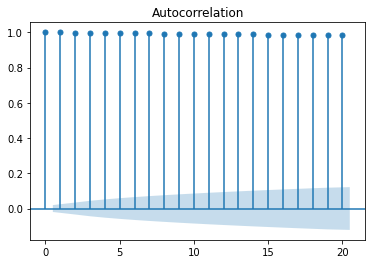

In [14]:
acf = player.autocorrelation(lag = 20, plots=True)

print(acf)
print("The estimated value of the player is: ", player.est, "While the true value is: ", 0.8)

[1.         0.03732182 0.04016945 0.0585503  0.0440298  0.04687743
 0.04626433 0.04440646 0.0434768  0.03811521 0.03433646 0.06348055
 0.04419007 0.05431871 0.04296387 0.0486606  0.05089659 0.05467243
 0.05439739 0.05697144 0.04147975 0.0516084  0.0269148  0.04434596
 0.05225864 0.03106876 0.04153547 0.0554844  0.02859634 0.04980479
 0.04636409]


/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


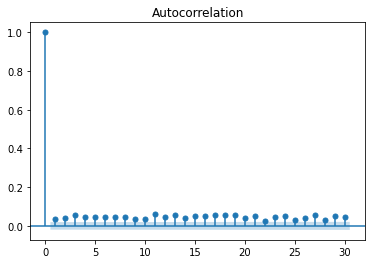

In [15]:
acf_so = player.so_autocorrelation(lag = 30, plots=True)

print(acf_so)

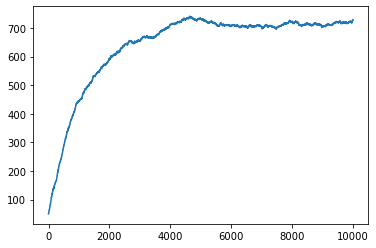

In [16]:
plt.plot(player.container)
plt.show()

639.8232176782321


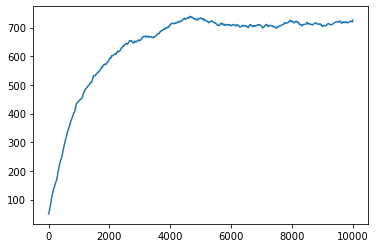

In [17]:
true_vec = np.repeat(player.true_value * player.urn_size, len(player.container))

diff_vec = player.container - true_vec

#convergence in probability
#plt.plot(abs(diff_vec))

print(np.mean(player.container))

#convergence in distribution
mean_vec = []
for i in range(1, len(player.container)):

    if i < 20:
        window = player.container[0:i]
        mean_vec.append(np.mean(window))
    else:
        window = player.container[(i-20):i]
        mean_vec.append(np.mean(window))

plt.plot(mean_vec)



## Urnings 2 with multiple students

### Setting up the simulation

In [10]:
#game settings
n_player = 10
n_items = 20
starting_score = 5
player_urn_sizes = 10
item_urn_sizes = 10

#true scores for players and items
player_true_scores = np.append(np.array([0.5]), np.random.normal(0, 1, n_player - 1))
item_true_scores = np.random.uniform(0, 1, n_items)
player_true_scores = np.exp(player_true_scores) / (1 + np.exp(player_true_scores)) 

#creating players and items
players = []
items = []
for i in range(n_player):
    pname = "player" + str(i)
    
    player = mu.Player(user_id = pname, score = starting_score, urn_size = player_urn_sizes, true_value = player_true_scores[i])
    players.append(player)

for i in range(n_items):
    iname = "item" + str(i)

    item = mu.Player(user_id = iname, score = int(np.round(item_true_scores[i] * item_urn_sizes)), urn_size = item_urn_sizes, true_value = item_true_scores[i])
    items.append(item)


### Setting up game environment

In [11]:
adaptive_rule = mu.Game_Type(adaptivity="n_adaptive", alg_type="Urnings2")
adaptive_sim = mu.Urnings(players = players, items = items, game_type=adaptive_rule)

adaptive_sim.play(n_games=10000)

[1.         0.93991349 0.8861262  0.83359875 0.7789828  0.73275455
 0.68694626 0.64449755 0.60457976 0.56886144 0.53819374 0.50752603
 0.48150023 0.45421459 0.43196832 0.41182178 0.38999546 0.37194866
 0.35936118 0.35265296 0.34594474 0.33293731 0.32036107 0.30776235
 0.29517486 0.28173625 0.2645181  0.25022835 0.23720968 0.21914039
 0.20821022]
The estimated value of the player is:  [0.4] While the true value is:  0.6224593312018546


/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


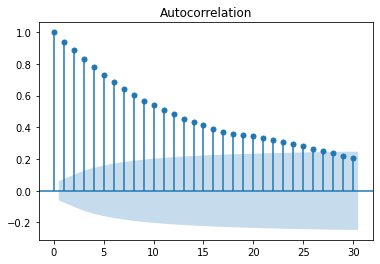

In [12]:
acf_2 = players[0].autocorrelation(lag = 30, plots=True)

print(acf_2)

print("The estimated value of the player is: ", players[0].est, "While the true value is: ", player_true_scores[0])


[ 1.00000000e+00 -5.33843700e-02 -1.06796016e-02  2.13489738e-02
 -7.47401678e-02 -3.56214946e-03 -2.84732695e-02 -1.42349466e-02
 -3.55873357e-02 -3.91460699e-02 -3.43475454e-06 -2.84698835e-02
  1.06727516e-02 -4.27082161e-02 -1.77971026e-02  1.42314729e-02
 -3.20320330e-02 -4.62669601e-02 -4.98256943e-02 -3.46402802e-06
  5.69396304e-02  3.56546712e-03 -1.06728622e-02  3.56546062e-03
 -7.80626034e-08  3.20284974e-02 -3.20320655e-02 -3.55881879e-03
  3.55838164e-02 -6.05019230e-02  3.20284811e-02]


/Users/bencegergely/opt/anaconda3/lib/python3.9/site-packages/statsmodels/tsa/stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


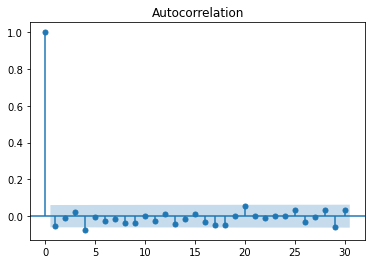

In [13]:
acf_2_so = players[0].so_autocorrelation(lag = 30, plots = True)

print(acf_2_so)


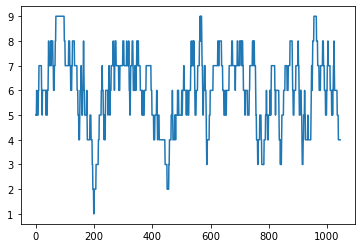

In [14]:
plt.plot(players[0].container)
plt.show()

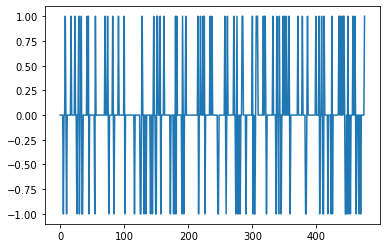

In [9]:
plt.plot(players[0].differential_container)
plt.show()